In [1]:
# Reuters dataset, a set of short newswires and their topics, published
# by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
# are 46 different topics; some topics are more represented than others, but each topic
# has at least 10 examples in the training set.

In [43]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

C:\Users\Nabeel\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Nabeel\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [44]:
print("train data length",len(train_data))
print("test data length",len(test_data))

train data length 8982
test data length 2246


In [21]:
#  deocde into text
# word_index = reuters.get_word_index()
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
# train_data[0]])
# train_labels[10]

In [22]:
#  now labelencode our data

In [45]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [46]:
#  one hot label encoding

In [47]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
        return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [48]:
#  build in label encoding method
# from keras.utils.np_utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [27]:
#  now model building
#  we use softmax for multi-class probability ditriburtui

In [49]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [10]:
# Model compiling

In [50]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
# using 1000 sempli for validation

In [51]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
#  Model Training

In [52]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 81ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 2/20
16/16 [==============================] - 1s 64ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 3/20
16/16 [==============================] - 1s 68ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 4/20
16/16 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.00 - 1s 69ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 5/20
16/16 [==============================] - 1s 66ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 6/20
16/16 [==============================] - 1s 67ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 7/20
16/16 [==============================] - 1s 70ms/step - loss: 0.0000e+00 

In [ ]:
# Ploting the traing and validation loss

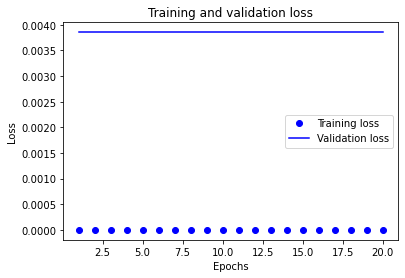

In [53]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
#  Ploting training and validation accuracy

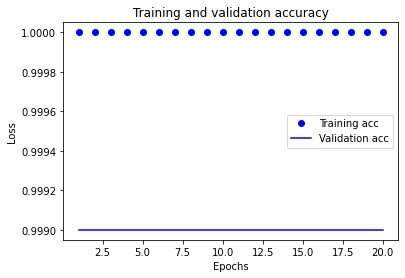

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#  now retaining our model

In [36]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 74ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 2/9
16/16 [==============================] - 1s 63ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 3/9
16/16 [==============================] - 1s 62ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 4/9
16/16 [==============================] - 1s 61ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 5/9
16/16 [==============================] - 1s 69ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 6/9
16/16 [==============================] - 1s 60ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 7/9
16/16 [==============================] - 1s 60ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy:

In [37]:
results

[0.0017070905305445194, 0.9995547533035278]

In [38]:
# This approach reaches an accuracy of ~80%. With a balanced binary classification
# problem, the accuracy reached by a purely random classifier would be 50%. But in
# this case it’s closer to 19%, so the results seem pretty good, at least when compared to
# a random baseline:

In [54]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19011576135351738

In [40]:
# Prediction

In [41]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [42]:
predictions

array([[0.02105588, 0.02251783, 0.02219126, ..., 0.0190987 , 0.02372087,
        0.02225589],
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913],
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913],
       ...,
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913],
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913],
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913]], dtype=float32)